# Carte Carrington

- synoptic map https://cesam.lam.fr/lascomission/Lascomission/synoptic_and_carrington_maps.html

In [11]:
import os
from module import carrington
import matplotlib.pyplot as plt

In [12]:
folder = 'carrington_test_data/'

carrington_list = []
for filename in os.listdir(folder):
    carrington_list.append(carrington(folder + filename))

C:\Users\lherrington\AppData\Local\Temp\ipykernel_16088\1421200280.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


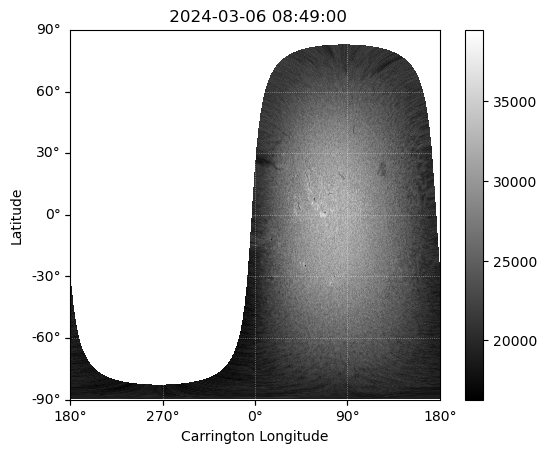

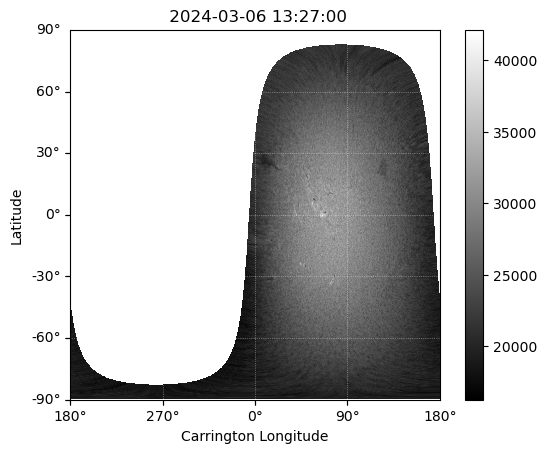

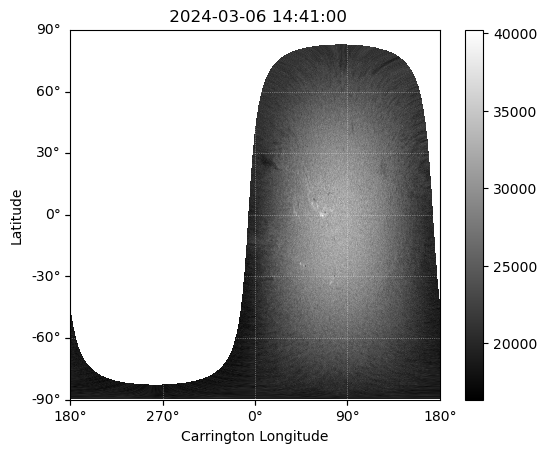

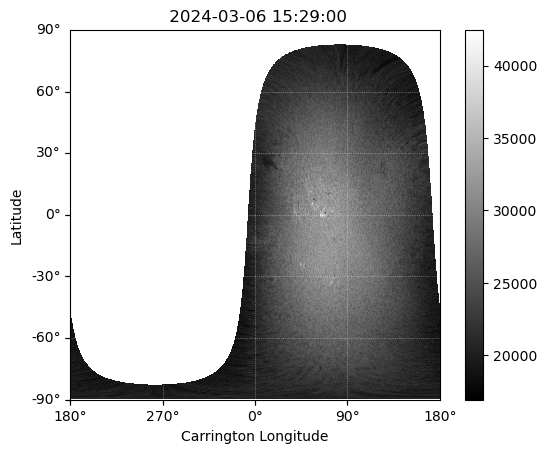

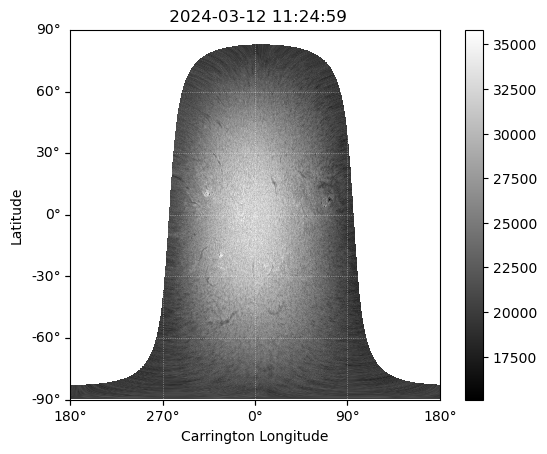

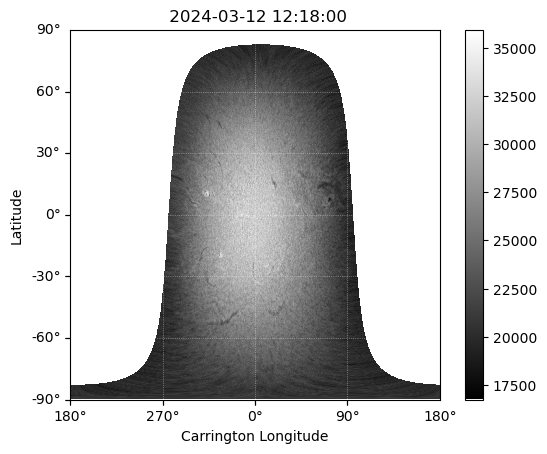

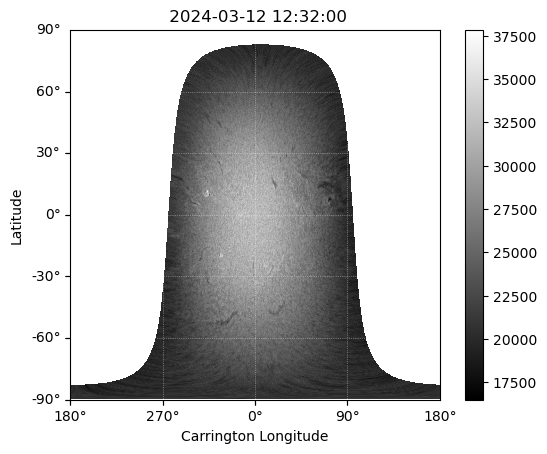

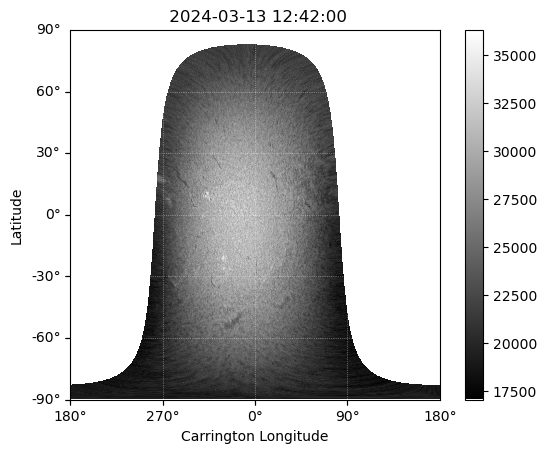

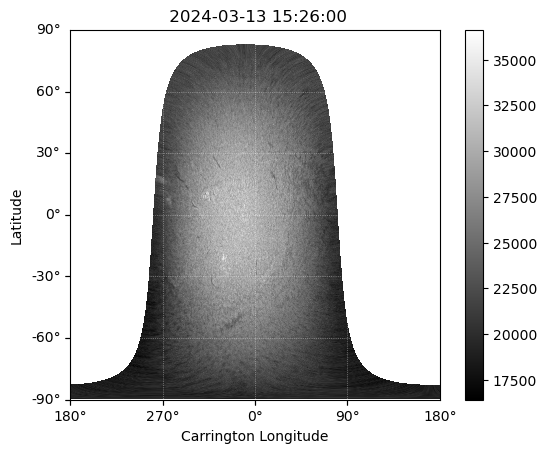

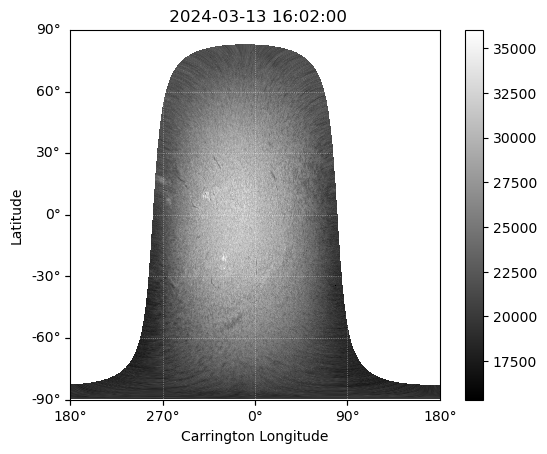

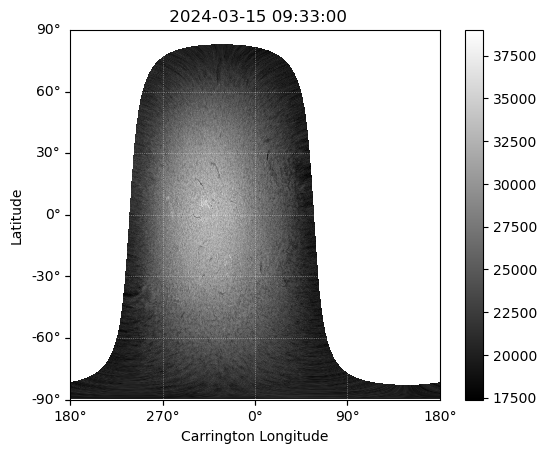

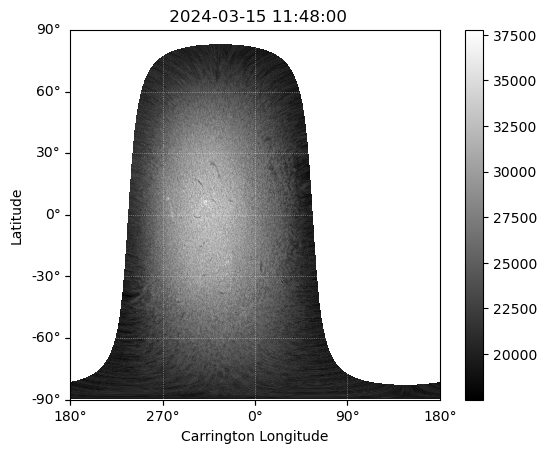

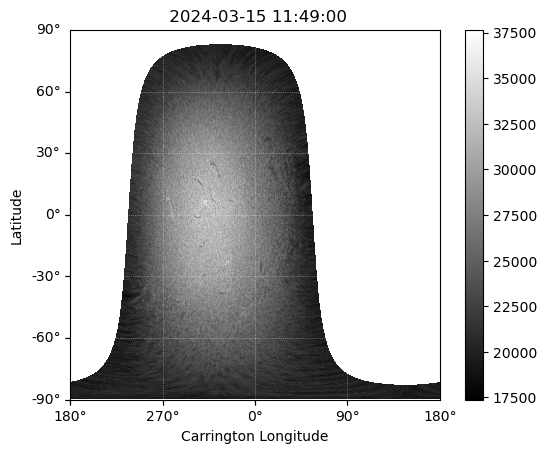

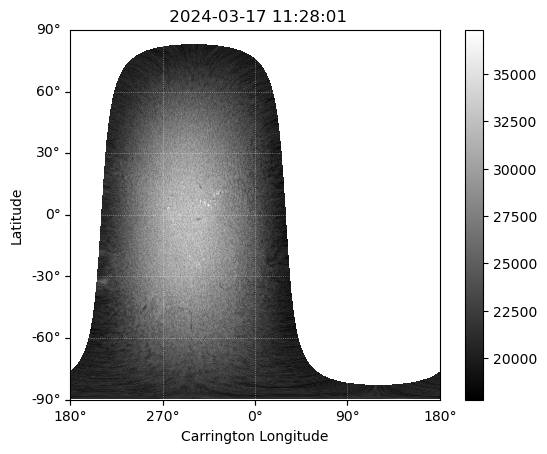

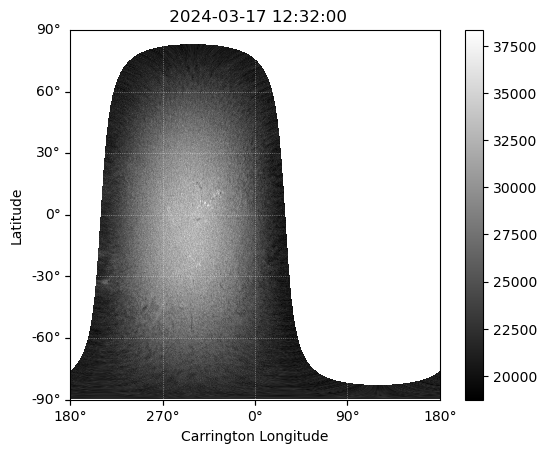

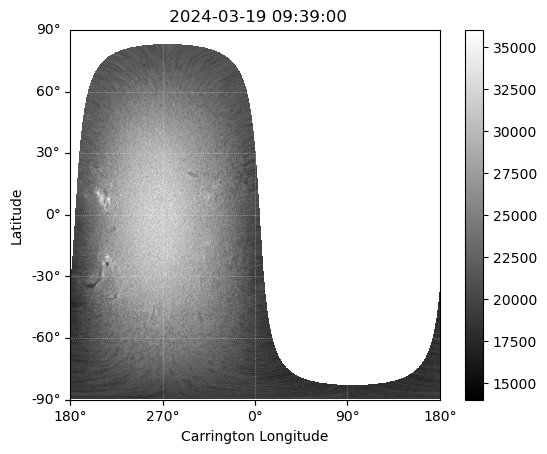

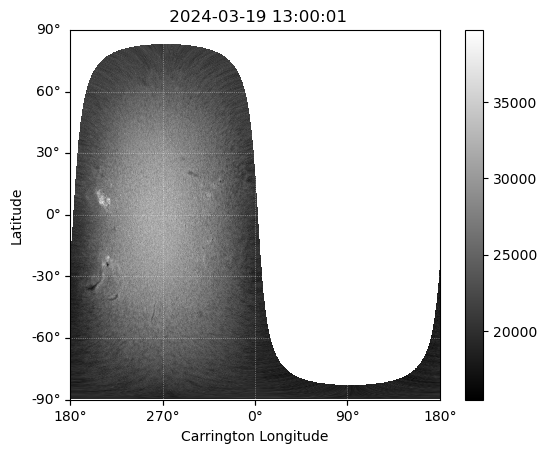

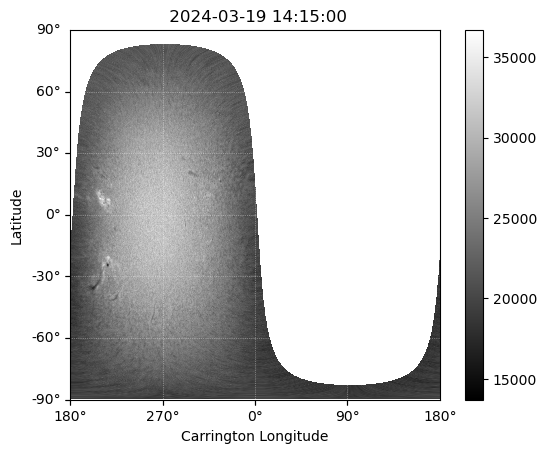

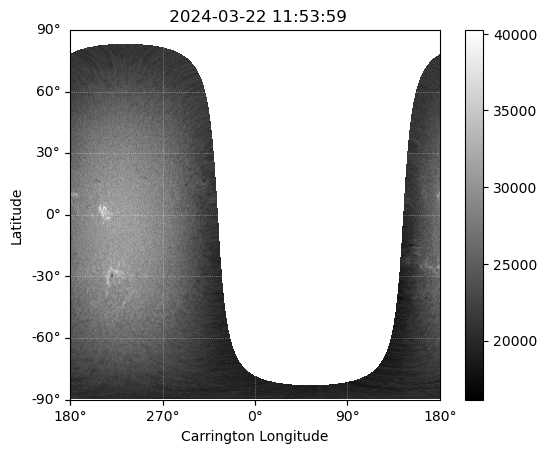

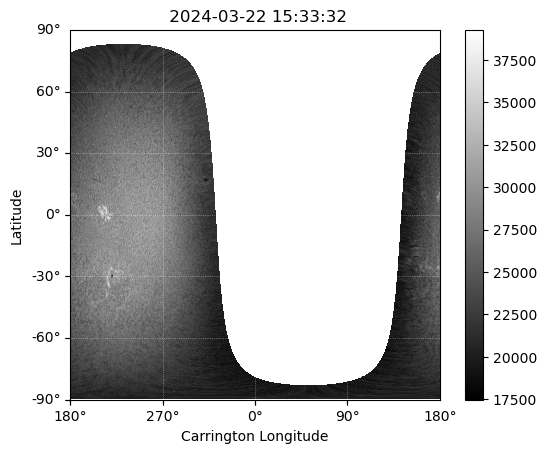

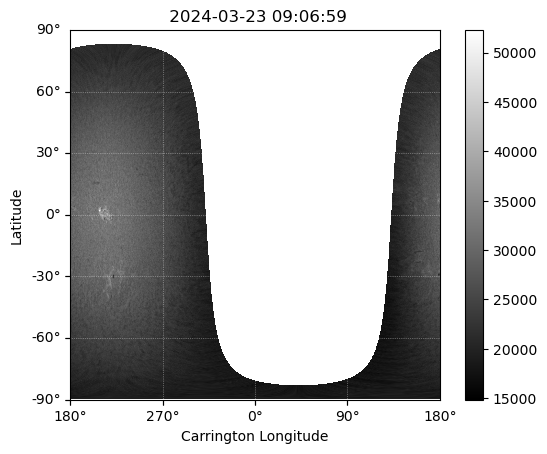

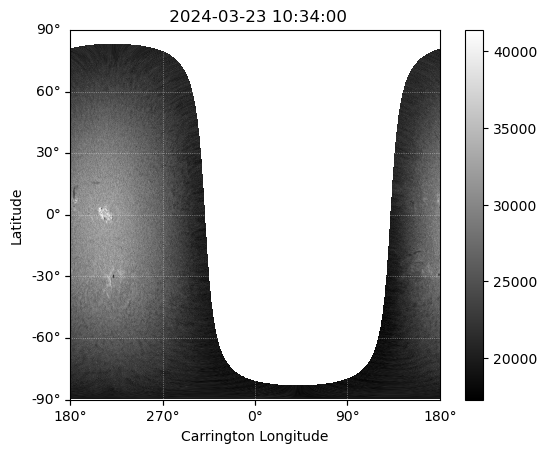

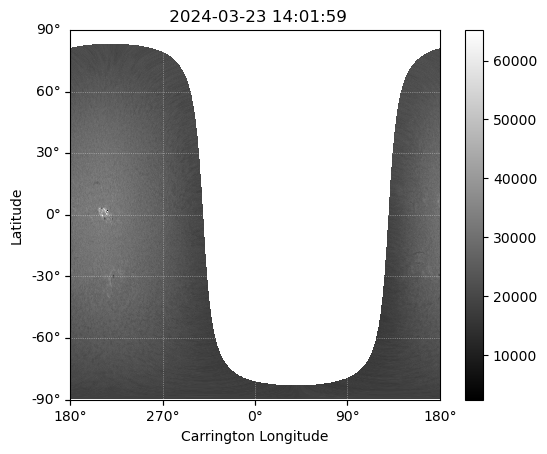

In [13]:
for carr in carrington_list:
    fig = plt.figure()
    ax = fig.add_subplot(projection=carr)
    im = carr.plot(axes=ax)
    plt.colorbar(im, ax=ax)

In [14]:
for carr in carrington_list:
    print((carr.carrington_longitude.deg))

86.61417495849005
84.07065915662386
83.39360535758377
82.95443468631467
6.127528400337665
5.642339810448644
5.5142169293308125
352.24400781703764
350.74305841648106
350.4135805315856
327.61448181853916
326.3788216010944
326.36966853880193
300.19947100188597
299.6137620729685
274.8322992234559
272.99196912503044
272.3054845508259
234.04298188052678
232.0326207297161
222.38621551270396
221.58938896231086
219.68483880917339


In [15]:
carrington_list.sort(key=lambda x: x.carrington_longitude.deg)

In [16]:
carr_longs = []
for carr in carrington_list:
    idx = int((carr.carrington_longitude.deg)*carr.data.shape[1]/360)
    carr_longs.append(idx)
    print(idx)

31
32
34
471
474
478
492
1249
1260
1265
1320
1331
1549
1553
1563
1704
1707
1856
1856
1863
1993
1995
2003


In [17]:
import numpy as np

img = np.full(carrington_list[0].data.shape, np.nan)
for idx in range(0,len(carrington_list)):    
    if idx==0:
        start_index = int(np.floor(carr_longs[0] - (2048-carr_longs[-1]+carr_longs[0])/2))
    else:
        start_index = end_index

    if idx==len(carrington_list)-1:
        end_index = int(np.ceil(carr_longs[0] - (2048-carr_longs[-1]+carr_longs[0])/2))
    else:
        end_index = int(np.ceil((carr_longs[idx]+carr_longs[idx+1])/2))
    
    print(start_index)
    print(end_index)
    
    if  start_index < 0 :
        img[:,start_index+2048:] = np.roll(carrington_list[idx].data, 1024, axis = 1)[:,start_index+2048:]
        img[:,:end_index] = np.roll(carrington_list[idx].data, 1024, axis = 1)[:,:end_index]
    else:  
        img[:,start_index:end_index] = np.roll(carrington_list[idx].data, 1024, axis = 1)[:,start_index:end_index]

# img = np.roll(img, 1024, axis = 1)

-7
32
32
33
33
253
253
473
473
476
476
485
485
871
871
1255
1255
1263
1263
1293
1293
1326
1326
1440
1440
1551
1551
1558
1558
1634
1634
1706
1706
1782
1782
1856
1856
1860
1860
1928
1928
1994
1994
1999
1999
-7


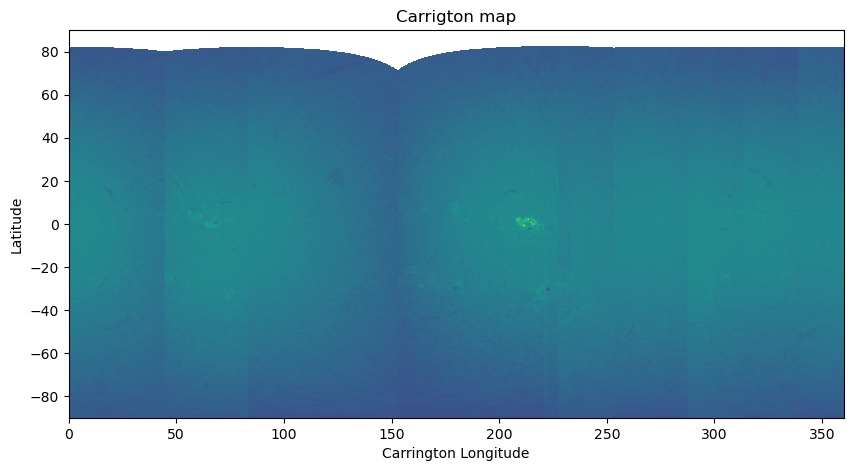

In [18]:
fig = plt.figure(figsize=(10,10))
plt.imshow(img, origin='lower', extent=[0,360,-90,90])
 
plt.axis()

plt.xlabel('Carrington Longitude');
plt.ylabel('Latitude');

plt.title('Carrigton map');

